In [ ]:
!pip install np_utils opendatasets

     |████████████████████████████████| 61 kB 642 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=7d6e96a1da025f9a8b6fcf474042657a7b1eb5d6ab8b68deb42e4fc34508974f
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [ ]:
import pandas as pd
import numpy as np

import opendatasets as od
import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint

# import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def download(url):
  #preventing multiple downloads and unziping
  folder_name = url.split("/")[-1]
  print(folder_name)
  data_dir = os.path.join('/content',folder_name)
  print(data_dir)
  if os.path.isdir(data_dir):
    print("Already Exists !")
    return
  od.download(url)

dataset_url = 'https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio'
download(dataset_url)

ravdess-emotional-speech-audio
/content/ravdess-emotional-speech-audio
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhanushaperera07
Your Kaggle Key: ··········


100%|██████████| 429M/429M [00:03<00:00, 133MB/s]


In [ ]:
!ls
!pwd

ravdess-emotional-speech-audio	sample_data
/content


In [ ]:
!cd /content

In [ ]:
!ls
!pwd

ravdess-emotional-speech-audio	sample_data
/content


In [ ]:
!cd /content/ravdess-emotional-speech-audio

In [ ]:
!ls
!pwd

ravdess-emotional-speech-audio	sample_data
/content


In [ ]:
# Paths for data.
Ravdess = "/content/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"


In [ ]:
!cd /content/ravdess-emotional-speech-audio/audio_speech_actors_01-24

In [ ]:
!ls
!pwd

ravdess-emotional-speech-audio	sample_data
/content


## Revdess Dataset

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

print(ravdess_directory_list)

['Actor_20', 'Actor_11', 'Actor_13', 'Actor_10', 'Actor_12', 'Actor_07', 'Actor_16', 'Actor_03', 'Actor_18', 'Actor_05', 'Actor_24', 'Actor_02', 'Actor_04', 'Actor_19', 'Actor_01', 'Actor_14', 'Actor_09', 'Actor_22', 'Actor_23', 'Actor_15', 'Actor_06', 'Actor_17', 'Actor_21', 'Actor_08']


In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(Ravdess,dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,calm,/content/ravdess-emotional-speech-audio/audio_...
1,happy,/content/ravdess-emotional-speech-audio/audio_...
2,angry,/content/ravdess-emotional-speech-audio/audio_...
3,happy,/content/ravdess-emotional-speech-audio/audio_...
4,disgust,/content/ravdess-emotional-speech-audio/audio_...


## Crema Dataset

In [ ]:
dataset_url = 'https://www.kaggle.com/ejlok1/cremad'
download(dataset_url)

cremad
/content/cremad
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhanushaperera07
Your Kaggle Key: ··········


100%|██████████| 451M/451M [00:03<00:00, 156MB/s]


In [ ]:
# Paths for data.
Crema = "/content/cremad/AudioWAV/"

In [ ]:
crema_directory_list = os.listdir(Crema)

print(crema_directory_list)

['1010_MTI_SAD_XX.wav', '1012_TIE_HAP_XX.wav', '1067_MTI_HAP_XX.wav', '1002_WSI_SAD_XX.wav', '1027_TAI_DIS_XX.wav', '1049_TSI_ANG_XX.wav', '1091_IOM_FEA_XX.wav', '1042_ITH_FEA_XX.wav', '1021_IEO_DIS_HI.wav', '1047_WSI_FEA_XX.wav', '1041_IOM_SAD_XX.wav', '1024_DFA_HAP_XX.wav', '1058_IWL_SAD_XX.wav', '1050_IWL_HAP_XX.wav', '1044_MTI_HAP_XX.wav', '1053_TAI_DIS_XX.wav', '1029_DFA_DIS_XX.wav', '1044_IWL_SAD_XX.wav', '1081_TAI_FEA_XX.wav', '1050_ITH_ANG_XX.wav', '1073_IEO_FEA_MD.wav', '1011_IEO_SAD_MD.wav', '1087_TAI_SAD_XX.wav', '1035_DFA_DIS_XX.wav', '1074_WSI_NEU_XX.wav', '1008_IOM_NEU_XX.wav', '1003_TIE_HAP_XX.wav', '1071_ITS_ANG_XX.wav', '1041_TAI_NEU_XX.wav', '1001_TSI_FEA_XX.wav', '1032_TAI_NEU_XX.wav', '1012_WSI_SAD_XX.wav', '1040_IEO_SAD_LO.wav', '1064_DFA_FEA_XX.wav', '1026_ITH_ANG_XX.wav', '1042_ITS_ANG_XX.wav', '1041_WSI_FEA_XX.wav', '1069_IWL_HAP_XX.wav', '1010_TSI_ANG_XX.wav', '1036_IEO_DIS_LO.wav', '1089_ITH_ANG_XX.wav', '1009_TIE_ANG_XX.wav', '1022_IWL_SAD_XX.wav', '1060_IEO_

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,sad,/content/cremad/AudioWAV/1010_MTI_SAD_XX.wav
1,happy,/content/cremad/AudioWAV/1012_TIE_HAP_XX.wav
2,happy,/content/cremad/AudioWAV/1067_MTI_HAP_XX.wav
3,sad,/content/cremad/AudioWAV/1002_WSI_SAD_XX.wav
4,disgust,/content/cremad/AudioWAV/1027_TAI_DIS_XX.wav


## TESS dataset 

In [ ]:
dataset_url = 'https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess'
download(dataset_url)

toronto-emotional-speech-set-tess
/content/toronto-emotional-speech-set-tess
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhanushaperera07
Your Kaggle Key: ··········


100%|██████████| 428M/428M [00:01<00:00, 266MB/s]


In [ ]:
Tess = "/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"

In [ ]:
tess_directory_list = os.listdir(Tess)

print(tess_directory_list)

['YAF_neutral', 'YAF_sad', 'YAF_disgust', 'YAF_pleasant_surprised', 'OAF_neutral', 'YAF_happy', 'OAF_angry', 'YAF_fear', 'OAF_disgust', 'YAF_angry', 'OAF_Fear', 'OAF_happy', 'OAF_Sad', 'OAF_Pleasant_surprise']


In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,neutral,/content/toronto-emotional-speech-set-tess/tes...
1,neutral,/content/toronto-emotional-speech-set-tess/tes...
2,neutral,/content/toronto-emotional-speech-set-tess/tes...
3,neutral,/content/toronto-emotional-speech-set-tess/tes...
4,neutral,/content/toronto-emotional-speech-set-tess/tes...


## SAVEE Dataset

In [ ]:
dataset_url = 'https://www.kaggle.com/ejlok1/surrey-audiovisual-expressed-emotion-savee'
download(dataset_url)

surrey-audiovisual-expressed-emotion-savee
/content/surrey-audiovisual-expressed-emotion-savee
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhanushaperera07
Your Kaggle Key: ··········


100%|██████████| 107M/107M [00:00<00:00, 129MB/s] 


In [ ]:
Savee = "/content/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [ ]:
savee_directory_list = os.listdir(Savee)

print(savee_directory_list)

['JK_n12.wav', 'DC_n21.wav', 'DC_a02.wav', 'DC_d01.wav', 'JE_f10.wav', 'JK_a15.wav', 'DC_h11.wav', 'KL_sa14.wav', 'JE_sa02.wav', 'KL_a04.wav', 'JE_d04.wav', 'JK_h04.wav', 'JE_n04.wav', 'DC_f14.wav', 'DC_h08.wav', 'JK_f04.wav', 'KL_f07.wav', 'DC_d07.wav', 'JE_n28.wav', 'DC_su08.wav', 'KL_f12.wav', 'DC_h05.wav', 'DC_n01.wav', 'DC_sa11.wav', 'DC_a01.wav', 'JE_h12.wav', 'DC_n15.wav', 'JE_n25.wav', 'KL_a11.wav', 'JE_f09.wav', 'KL_n24.wav', 'JK_sa06.wav', 'JE_n30.wav', 'JE_sa12.wav', 'KL_a03.wav', 'KL_d13.wav', 'JE_su05.wav', 'DC_su15.wav', 'DC_f03.wav', 'DC_d10.wav', 'JK_n17.wav', 'KL_n07.wav', 'JK_n27.wav', 'JK_d03.wav', 'JK_h02.wav', 'KL_a06.wav', 'JK_sa08.wav', 'KL_sa11.wav', 'JK_n06.wav', 'JE_su10.wav', 'KL_d11.wav', 'JK_f09.wav', 'JE_a07.wav', 'DC_n11.wav', 'DC_d11.wav', 'JK_d01.wav', 'JK_h15.wav', 'JE_sa05.wav', 'JE_h07.wav', 'KL_n21.wav', 'JE_a15.wav', 'DC_a13.wav', 'DC_d02.wav', 'JE_n14.wav', 'DC_n22.wav', 'JK_n13.wav', 'JE_f13.wav', 'JE_su08.wav', 'JE_f02.wav', 'KL_d15.wav', 'JE_a1

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,neutral,/content/surrey-audiovisual-expressed-emotion-...
1,neutral,/content/surrey-audiovisual-expressed-emotion-...
2,angry,/content/surrey-audiovisual-expressed-emotion-...
3,disgust,/content/surrey-audiovisual-expressed-emotion-...
4,fear,/content/surrey-audiovisual-expressed-emotion-...


## Concat all DataFrames

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()



,Emotions,Path
0,calm,/content/ravdess-emotional-speech-audio/audio_...
1,happy,/content/ravdess-emotional-speech-audio/audio_...
2,angry,/content/ravdess-emotional-speech-audio/audio_...
3,happy,/content/ravdess-emotional-speech-audio/audio_...
4,disgust,/content/ravdess-emotional-speech-audio/audio_...


## Data Visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


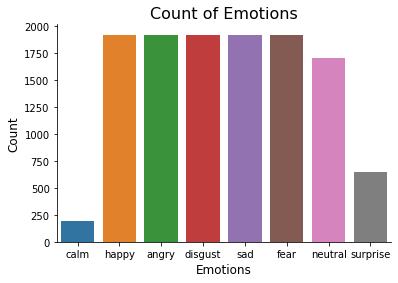

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)



In [ ]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

## Feature Extraction Part

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)



/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [ ]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,labels
0,0.242273,0.511502,0.514671,0.535456,0.479251,0.457345,0.464548,0.569587,0.655120,0.593717,0.537237,0.517025,0.529022,-724.245605,45.396709,-11.103415,9.705283,-7.752767,-7.905915,-13.661086,-15.092793,-10.026347,-5.383527,-7.736581,-11.926711,-6.380772,-1.499521,-10.812358,-6.913947,-8.130037,-3.894538,-8.202288,-6.691195,0.001052,4.209509e-07,2.800735e-07,5.150155e-07,2.314963e-07,1.495632e-06,0.000118,...,0.000014,0.000017,0.000027,0.000016,0.000004,0.000004,8.473862e-06,0.000010,0.000012,0.000011,0.000011,0.000012,0.000009,0.000007,0.000005,0.000005,0.000004,0.000006,0.000006,0.000004,0.000004,5.442612e-06,0.000006,0.000003,2.421934e-06,3.131076e-06,3.790445e-06,3.141869e-06,3.696873e-06,3.569399e-06,6.047585e-06,4.240112e-06,0.000003,3.933498e-06,2.398466e-06,4.654767e-06,3.590509e-06,1.269939e-06,1.018426e-07,calm
1,0.316872,0.680895,0.715519,0.736780,0.689539,0.689802,0.624243,0.694157,0.749247,0.696319,0.661817,0.659041,0.678376,-535.304248,19.660478,2.860171,2.735041,-1.406830,-3.542589,-5.989962,-7.754974,-5.318214,-2.303972,-3.045526,-5.480265,-2.416678,-1.246536,-4.516643,-4.678095,-3.678752,-3.382822,-4.766979,-4.131207,0.001222,1.095063e-05,1.008632e-05,1.242284e-05,1.153533e-05,1.108834e-05,0.000125,...,0.000024,0.000027,0.000037,0.000026,0.000014,0.000014,1.895662e-05,0.000020,0.000022,0.000021,0.000021,0.000022,0.000019,0.000016,0.000015,0.000015,0.000014,0.000016,0.000016,0.000014,0.000014,1.503114e-05,0.000016,0.000013,1.247601e-05,1.289764e-05,1.274668e-05,1.298923e-05,1.276575e-05,1.287789e-05,1.638138e-05,1.421599e-05,0.000013,1.384984e-05,1.227650e-05,1.417436e-05,1.327867e-05,1.122782e-05,9.807750e-06,calm
2,0.174219,0.554633,0.536451,0.544772,0.534651,0.454636,0.441257,0.487072,0.631173,0.685730,0.611109,0.555840,0.555429,-788.042969,44.059246,-13.022401,8.864052,-11.372404,-7.826353,-16.902880,-15.760712,-11.067672,-5.400486,-11.562859,-11.837321,-4.859106,-3.754759,-13.165998,-6.426666,-9.295454,-5.406544,-10.526425,-4.424126,0.000532,5.000554e-08,4.118638e-08,6.494830e-08,5.641844e-08,2.458681e-07,0.000004,...,0.000003,0.000003,0.000003,0.000004,0.000006,0.000002,9.013091e-07,0.000002,0.000003,0.000002,0.000002,0.000003,0.000003,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,8.580265e-07,0.000001,0.000001,7.809056e-07,5.185665e-07,4.775875e-07,9.519105e-07,8.898314e-07,7.675743e-07,7.171692e-07,9.401352e-07,0.000001,8.210750e-07,7.067217e-07,6.329745e-07,5.456509e-07,3.293764e-07,1.509085e-08,calm
3,0.249693,0.467618,0.516189,0.625808,0.623878,0.588423,0.578139,0.470084,0.369011,0.412300,0.477156,0.590986,0.539554,-354.297302,15.759007,-47.172291,-20.197212,-25.359724,-26.587732,-18.613363,-23.424046,-11.533126,2.670619,5.288334,19.661110,8.130602,11.165944,-11.670353,-9.048133,-0.527577,-7.454526,-4.821998,-1.301414,0.048443,2.989254e-05,1.274869e-05,3.674294e-05,4.500718e-05,3.751091e-05,0.000049,...,0.022741,0.015032,0.024810,0.023599,0.018442,0.013832,1.444636e-02,0.036469,0.031264,0.017076,0.012880,0.009261,0.004236,0.002490,0.001453,0.001571,0.001610,0.001437,0.001035,0.000847,0.000815,1.073915e-03,0.001942,0.003405,5.044174e-03,5.479167e-03,3.502152e-03,3.817743e-03,3.169982e-03,2.622025e-03,3.615391e-03,2.920009e-03,0.003699,3.510075e-03,3.156328e-03,3.603583e-03,3.125067e-03,9.288634e-04,6.842436e-05,happy
4,0.323012,0.645727,0.625971,0.677457,0.743309,0.757251,0.721201,0.632649,0.558068,0.493183,0.517448,0.559238,0.655971,-170.287167,11.417744,-11.181241,-10.119650,-9.132142,-7.630348,-5.870827,-7.265841,-2.696838,2.782795,6.278203,8.616637,6.218167,3.830104,-3.844735,-5.317791,-2.843046,-4.884391,-4.152274,1.227777,0.054941,1.834352e-02,2.117010e-02,1.959132e-02,1.837408e-02,1.926036e-02,0.

In [ ]:
## Data Preparation

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape



((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 21s 12ms/step - loss: 1.6808 - accuracy: 0.3203 - val_loss: 1.4481 - val_accuracy: 0.4246 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 4s 10ms/step - loss: 1.4410 - accuracy: 0.4234 - val_loss: 1.3082 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 4s 10ms/step - loss: 1.3413 - accuracy: 0.4651 - val_loss: 1.2613 - val_accuracy: 0.4927 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 4s 10ms/step - loss: 1.2893 - accuracy: 0.4901 - val_loss: 1.2411 - val_accuracy: 0.5078 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 4s 10ms/step - loss: 1.2456 - accuracy: 0.5028 - val_loss: 1.2133 - val_accuracy: 0.5168 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 4s 10ms/step - loss: 1.2199 - accuracy: 0.5109 - val_loss: 1.1490 - val_accuracy: 0.5335 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 4s 10ms/s

### Print Accuracy of the model

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

286/286 [==============================] - 1s 4ms/step - loss: 1.0561 - accuracy: 0.6039
Accuracy of our model on test data :  60.392457246780396 %


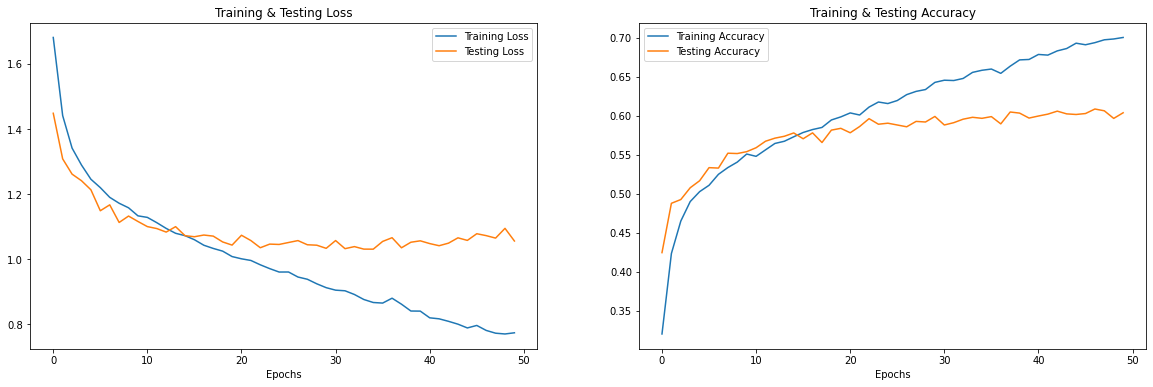

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,happy,neutral
1,disgust,disgust
2,neutral,neutral
3,sad,neutral
4,angry,angry
5,neutral,neutral
6,disgust,sad
7,surprise,surprise
8,neutral,disgust
9,fear,fear
